In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)

In [3]:
X = df[df.columns[0:60]].values
y = df[df.columns[60]].values
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

<h2>Converting the y values into numbers</h2>
<li>In our regression example, we used 0 for rocks and 1 for mines
<li>sklearn has a LabelEncoder that will replace text with numbered labels

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<li>That's not optimal because:
<ol>
<li>0 < 1 but rocks are not less than mines or mines less than rocks
<li>The average of 0 and 1 is meaningless

<h2>One-hot encoding</h2>
<li>comes from digital electronics
<li>only binary values are allowed
<li>all values are 0 except for one 1 (the "one hot" part)

<h2>Example</h2>
Consider the following data fragment:
<table>
<tr><td>Name</td><td>Income</td><td>City</td></tr>
<tr><td>John</td><td>120000</td><td>New York</td></tr>
<tr><td>Jill</td><td>20000</td><td>Chicago</td></tr>
<tr><td>Jae</td><td>75000</td><td>New York</td></tr>
<tr><td>Jane</td><td>179000</td><td>Los Angeles</td></tr>
<tr><td>Jake</td><td>10000</td><td>Los Angeles</td></tr>
</table>
<li>We want to encode City. One option:
<table>
<tr><td>Name</td><td>Income</td><td>City</td></tr>
<tr><td>John</td><td>120000</td><td>1</td></tr>
<tr><td>Jill</td><td>20000</td><td>2</td></tr>
<tr><td>Jae</td><td>75000</td><td>1</td></tr>
<tr><td>Jane</td><td>179000</td><td>3</td></tr>
<tr><td>Jake</td><td>10000</td><td>3</td></tr>
</table>
<li>But New York is not less than Chicago (quite the contrary!)
<li>Nor is Chicago the average of New York and LA (that would be weird!)
<li>Better to replace City with the following "one hot encoding"
<table>
<tr><td>Name</td><td>Income</td><td>New York</td><td>Chicago</td><td>Los Angeles</td></tr>
<tr><td>John</td><td>120000</td><td>1</td><td>0</td><td>0</td></tr>
<tr><td>Jill</td><td>20000</td><td>0</td><td>1</td><td>0</td></tr>
<tr><td>Jae</td><td>75000</td><td>1</td><td>0</td><td>0</td></tr>
<tr><td>Jane</td><td>179000</td><td>0</td><td>0</td><td>1</td></tr>
<tr><td>Jake</td><td>10000</td><td>0</td><td>0</td><td>1</td></tr>
</table>

<h2>One hot encoder</h2>
<li>general function to do one hot encoding

In [5]:
array = np.array(['New York','Chicago','New York','Los Angeles','Los Angeles'])

<h4>convert data into numerical labels</h4>

In [6]:
array = np.array(['New York','Chicago','New York','Los Angeles','Los Angeles'])
encoder.fit(array)
coded_array = encoder.transform(array)
coded_array

array([2, 0, 2, 1, 1])

<h4>create a one hot coded array</h4>

In [7]:
n = len(coded_array)
n_labels = len(np.unique(coded_array))
n_labels
one_hot = np.zeros((n,n_labels))
np.arange(n),coded_array
one_hot[np.arange(n), coded_array] = 1
one_hot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [8]:
np.arange(n)

array([0, 1, 2, 3, 4])

<h3>Function</h3>

In [9]:
def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot
one_hot_encoder(array)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
# coded_array

<h3>One hot encode the y (rocks/mines) column</h3>

In [11]:
Y=one_hot_encoder(y)
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [12]:
# one_hot_encoder(df[df.columns[60]].values)

<h1>Building the neural net</h1>
<li>We need to decide:
<ol>
<li>Number of hidden layers
<li>Number of nodes in each hidden layer
<li>Number of nodes in the input layer
<li>Number of nodes in the output layer
<li>Number of training passes (epochs)
<li>Activation function to use
<li>The "learning rate"



<h3>Learning rate</h3>
A hyper parameter that controls how much weights should be adjusted after each epoch
<li>Too low, the model will take a long time to converge (expensive GPU cost)
<li>Too high, the model may never converge
<li>Bit of guesswork goes into this (e.g., start low, slowly increase the rate, see how the loss changes (loss = prediction error), and adjust the rate accordingly

<h3>hidden layers</h3>
<li>We'll start with one hidden layer
<li>With 60 nodes 

In [13]:
hidden_layers = (60,)

<h3>Input layer</h3>
<li>60 input nodes, corresponding to each sonar frequency

In [14]:
# X


<h3>Output layer</h3>
<li>2 classes, one hot encoded

In [15]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

<h3>learning rate</h3>
<li><b>Constant:</b> constant set to <i>learning_rate_init</i> which defaults to 0.001
<li><b>invscaling:</b> decreases the learning rate gradually using an exponent set by the parameter <i>power_t</i> (defaults to 0.5)
<li><b>adaptive:</b> starts at <i>learning_rate_init</i> but adjusts rate if two consecutive epochs fail to decrease loss by parameter <i>tol</i> (defaults to 1e-04)


<h3>Passes/epochs</h3>

In [16]:
epochs = 500

<h3>sklearn has a Multi-layer Perceptron Classifier</h3>

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(60,), max_iter = epochs, random_state=1)

<h3>Training and testing</h3>

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [19]:
clf.fit(xtrain, ytrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(60,), max_iter=500,
              random_state=1, solver='lbfgs')

<h3>If you must know!</h3>
<li><b>solver</b>: sgd (stochastic gradient descent), lbfgs (limited memory Broyden–Fletcher–Goldfarb–Shanno algorithm), adam (stochastic gradient based optimizer)
<li><b>activation</b>: logistic (sigmoid), tanh (hyperbolic tan function), relu (linear unit function). relu returns max(0,x) and works better on two class dependent variables (we don't want both returned
<li><b>alpha</b>: L2 regularization term. Regularization is used to prevent overfitting by not using the exact loss (difference between predicted and actual) when adjusting the weights (in a neural network model). L2 adds the sum of the square of the weights modified by a lambda parameter to each delta
<li><b>batch size</b>: Number of cases to use in one epoch. 
<li><b>momentum</b>: A number between 0 and 1 that accelerates a gradient descent algorithm if it is moving in the right (consistent) direction
<li><b>shuffle</b>: shuffle the samples in each iteration (the order in which they are presented will change
<li><b>tol</b>: if the improvement is less than this, the algorithm stops


In [20]:
predictions = clf.predict(xtest)

In [21]:
actuals = ytest

In [22]:
tp=tn=fp=fn=0
for i in range(len(actuals)):
    a_class=p_class=0
    if int(actuals[i][0] == 0):
        a_class = 1 
    if int(predictions[i][0] == 0):
        p_class = 1
    if a_class == 1 and p_class == 1:
        tp +=1
    elif a_class == 1 and p_class == 0:
        fn +=1
    elif a_class == 0 and p_class == 0:
        tn +=1
    elif a_class == 0 and p_class == 1:
        fp +=1
print(tp,tn,fp,fn)
print("Accuracy: %1.2f"%((tp+tn)*100/(tp+tn+fp+fn)))
#(tp+tn)/(tp+tn+fp+fn)*100 )
    

17 18 3 4
Accuracy: 83.33


<h1>Comparing the models</h1>


<h2>Logistic regression</h2>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df[60]=np.where(df[60]=='R',0,1)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:60]
y_train = train[60]
x_test = test.iloc[0:,0:60]
y_test = test[60]

In [24]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
actuals = np.array(y_test)
logistic_acc = model.score(x_test,actuals)
print(logistic_acc)

0.8095238095238095


<h2>Random forest</h2>

In [25]:
# Y.shape

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(10,30, 50,100), #the number of trees
     'max_samples':(.30,.40,.50,1.0),
#      'max_features':(5,10,20,60),
     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
inputs = X
outputs = df[60]
model.fit(inputs, np.ravel(outputs))
model.best_score_, model.best_params_

(0.668599033816425, {'max_samples': 0.4, 'n_estimators': 30})

In [27]:
# rf = BaggingClassifier(max_features=5,max_samples=0.5,n_estimators=100)
rf = BaggingClassifier(max_samples=0.3,n_estimators=100)
rf.fit(x_train,y_train)
rf_acc = rf.score(x_test,y_test)
print(rf_acc)

0.746031746031746


<h2>Neural network</h2>

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((30,),(60,),(80,)),
    'max_iter': (500, 1000)
}
gs = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters,cv=5)
gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)


0.6548199767711962
{'activation': 'relu', 'hidden_layer_sizes': (80,), 'learning_rate': 'invscaling', 'max_iter': 500, 'solver': 'adam'}


In [29]:
# gs.best_score_

In [30]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(30,), max_iter = 500, 
                    activation='logistic',
                    learning_rate='invscaling')
# clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(60,), max_iter = 500, 
#                     activation='relu',
#                     learning_rate='constant')
clf.fit(xtrain,ytrain)
predictions = clf.predict(xtest)
actuals = ytest
tp=tn=fp=fn=0
for i in range(len(actuals)):
    a_class=p_class=0
    if int(actuals[i][0] == 0):
        a_class = 1 
    if int(predictions[i][0] == 0):
        p_class = 1
    if a_class == 1 and p_class == 1:
        tp +=1
    elif a_class == 1 and p_class == 0:
        fn +=1
    elif a_class == 0 and p_class == 0:
        tn +=1
    elif a_class == 0 and p_class == 1:
        fp +=1
print(tp,tn,fp,fn)
nn_accuracy = ((tp+tn)*100/(tp+tn+fp+fn))
print(nn_accuracy)

15 20 1 6
83.33333333333333


In [31]:
print("Logistic regression: %1.2f"%(logistic_acc))
print("Random forest: %1.2f"%(rf_acc))
print("Neural network: %1.2f"%(nn_accuracy))

Logistic regression: 0.81
Random forest: 0.75
Neural network: 83.33


<h1>Activation Functions</h1>

<h2>Sigmoid</h2>  

Ranges from 0 to 1

<h2>tanh</h2>

Ranges from -1 to +1

<h2>ReLU</h2>  (Rectified Linear Unit)

max(0,x)  ------------->  piecewise linear

<h2>Softmax</h2> 

vector of probabilities that add up to 1 - good for multiclass output layer activation



<h1>Sigmoid and tanh have two limitations:</h1>


<h2>Vanishing gradient problem</h2>

- In deep networks the backprop alg computed deltas in subsequent layers is progressively smaller than earlier layers because of the gradient getting so small.
- So although they help learn complex mapping functions, they don't do well in very deep networks 
- This is more of a problem in a network with lots of hidden layers (very deep networks)
- This isn't a problem with ReLU since the slope of the ReLU function is always 1.

<h2>Saturate to 1 or 0 </h2>



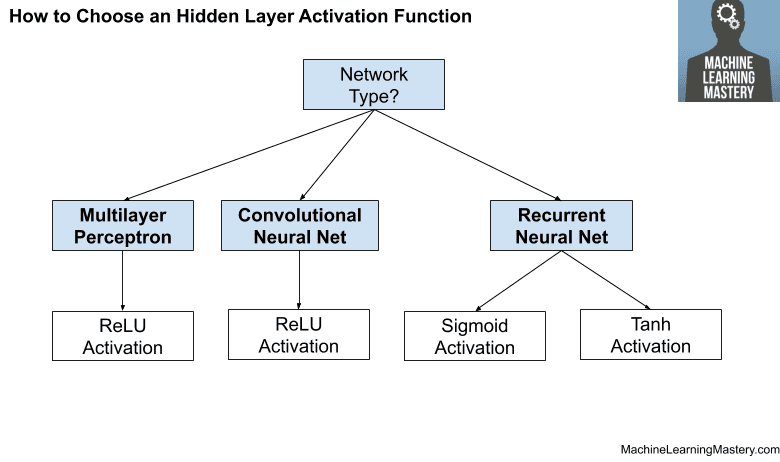

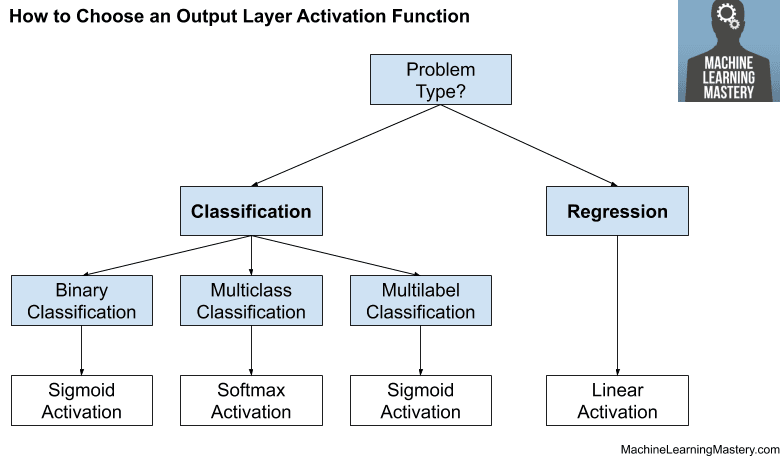

- Have to choose an activation function for each of the hidden layers, and an activation function for the output layer.
- Note: The output layer cannot have a sigmoid if it's a linear regression problem since a sigmoid will be predicting values between 0 and 1. For regressin problems, the liner fucntion or the ReLU function would be a good activation function for the output layer. 